In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

read in all .csv-files and combine them to a common dataframe

In [2]:
df0 = pd.read_csv('gw welt quaschning/pvPower_01-03.csv')
df1 = pd.read_csv('gw welt quaschning/pvPower_04-06.csv')
df2 = pd.read_csv('gw welt quaschning/pvPower_07-09.csv')
df3 = pd.read_csv('gw welt quaschning/pvPower_10-12.csv')
df4 = pd.read_csv('gw welt quaschning/pvPower_13-15.csv')
df5 = pd.read_csv('gw welt quaschning/pvPower_16-18.csv')
df6 = pd.read_csv('gw welt quaschning/pvPower_19-21.csv')
df7 = pd.read_csv('gw welt quaschning/pvPower_98-00.csv')

df_all = pd.merge(df7, df0)
for frame in [df1, df2, df3, df4, df5, df6]:
    df_all = pd.merge(df_all,frame, how='outer')

tidy and clean up data. select years from 2000-2019. and give them all the same Power units.

In [3]:
# replace NaN with 0    
df_all = df_all.fillna(0)

# select 2000-2019
df_all = df_all.drop(['1998', '1999', '2020', '2021'], axis = 1)

# bring 2000-2006 from MW to GW
df_all.update(df_all.iloc[:, 1:8].div(1000))

# restrict dec to 3
df_all = np.round(df_all, decimals=3)

# save as csv
df_all.to_csv('Solar_PV_Power2000-2019.csv', index = True)

build plots for the countries we research

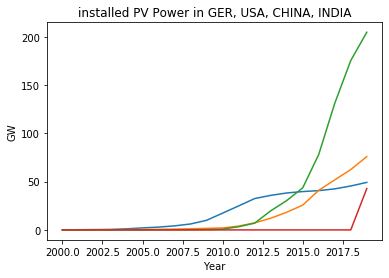

In [4]:
df_all.set_index("Land", inplace = True)
Year = range(2000, 2020)
countries = ['Deutschland', 'USA', 'China', 'Indien']

for country in countries:    
    GW = df_all.loc[country] 
    data_plot1 = pd.DataFrame({"Year":Year, "GW":GW})
    p1 = sns.lineplot(x = "Year", y = "GW", data=data_plot1)
    p1.set_title('installed PV Power in GER, USA, CHINA, INDIA')

In [5]:
df_all

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Land,,,,,,,,,,,,,,,,,,,,
Japan,0.330,0.453,0.637,0.860,1.132,1.422,1.708,1.919,2.144,2.627,3.620,4.910,6.63,13.60,23.34,34.15,42.10,49.50,56.20,63.0
USA,0.139,0.168,0.212,0.275,0.376,0.479,0.624,0.831,1.169,1.616,2.040,3.960,7.33,12.08,18.32,25.67,41.00,51.80,62.50,75.9
Deutschland,0.089,0.206,0.324,0.473,1.139,2.072,2.918,4.195,6.153,9.959,17.370,24.860,32.46,35.77,38.25,39.71,40.70,42.50,45.50,49.2
Australien,0.029,0.034,0.039,0.046,0.052,0.061,0.070,0.083,0.105,0.188,0.570,1.380,2.42,3.23,4.09,5.11,5.90,7.20,11.00,14.6
Italien,0.019,0.020,0.022,0.026,0.031,0.038,0.050,0.120,0.458,1.181,3.500,12.800,16.45,18.07,18.61,18.91,19.30,19.70,20.10,20.8
Schweiz,0.015,0.018,0.020,0.021,0.023,0.027,0.030,0.036,0.048,0.074,0.110,0.210,0.44,0.76,1.06,1.39,1.70,1.90,2.10,0.0
Mexiko,0.014,0.015,0.016,0.017,0.018,0.019,0.020,0.021,0.022,0.025,0.030,0.040,0.05,0.11,0.11,0.17,0.30,0.50,4.10,0.0
Frankreich,0.011,0.014,0.017,0.021,0.026,0.026,0.036,0.075,0.179,0.369,1.200,2.970,4.09,4.73,5.70,6.59,7.20,8.10,9.00,9.9
Niederlande,0.008,0.016,0.022,0.040,0.043,0.045,0.048,0.049,0.053,0.064,0.080,0.140,0.36,0.72,1.12,1.56,2.10,2.90,4.40,0.0
